In [176]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [177]:
#Appling Dataset and validation path
dataset_path = 'E:\\sem 8\\Datasets\\ear recognition datasets\\Dataset1'
validation_path = 'E:\\sem 8\\Datasets\\ear recognition datasets\\Dataset1\\validation'

#Getting number of folders in the directory
os.listdir(dataset_path)

['info.txt', 'test', 'train', 'validation']

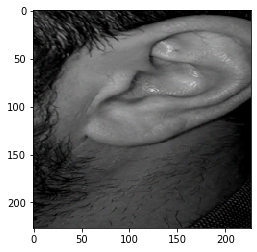

In [178]:
#Appling training path and reading an image
train_path = 'E:\\sem 8\\Datasets\\ear recognition datasets\\Dataset1\\train'
train_image_path = train_path + '\\000'
train_img = os.listdir(train_image_path)[0]
train_img_path = train_image_path + '\\' + train_img
plt.imshow(imread(train_img_path))

In [179]:
#To check if we need to normalize the input or not
print(imread(train_img_path).max())
print(imread(train_img_path).min())

0.85490197
0.0


(227, 227, 3)

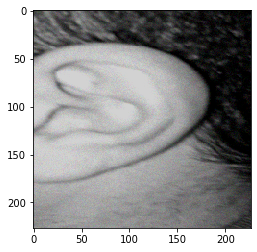

In [180]:
#Appling testing path and reading an image
test_path = 'E:\\sem 8\\Datasets\\ear recognition datasets\\Dataset1\\test'
test_image_path = test_path + '\\000'
test_img = os.listdir(test_image_path)[0]
test_img_path = test_image_path + '\\' + test_img
plt.imshow(imread(test_img_path))
imread(test_img_path).shape

In [181]:
#To check if we need to normalize the input or not
print(imread(test_img_path).max())
print(imread(test_img_path).min())

0.8235294
0.0


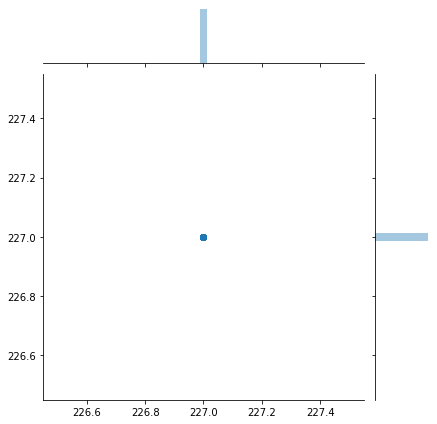

In [182]:
#Checking the dimensions of every images in train dataset
dim1 = []
dim2 = []
train_classes = os.listdir(train_path)
for classes in train_classes:
    for image_filename in os.listdir(train_path+'\\'+ classes):
        imgs = imread(train_path+'\\'+ classes+ '\\' + image_filename)
        d1, d2, colors = imgs.shape
        dim1.append(d1)
        dim2.append(d2)
sns.jointplot(dim1,dim2)

#image shape = (227,227,3)

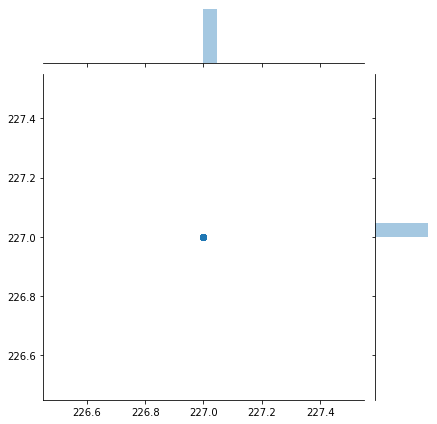

In [183]:
#Checking the dimensions of every images in test dataset
dim1 = []
dim2 = []
test_classes = os.listdir(test_path)
for classes in train_classes:
    for image_filename in os.listdir(test_path+'\\'+ classes):
        imgs = imread(test_path+'\\'+ classes+ '\\' + image_filename)
        d1, d2, colors = imgs.shape
        dim1.append(d1)
        dim2.append(d2)
sns.jointplot(dim1,dim2)

#image shape = (227,227,3)

In [184]:
image_shape = (227,227,3)


In [185]:
#Creating a data generator for train and validation datasets
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        )


In [186]:
#Creating generators and finding no. of classes and images in train and validation datasets
train_gen = datagen.flow_from_directory(train_path,
                                        target_size = image_shape[:2],
                                        color_mode="rgb",
                                        batch_size = 16,
                                        class_mode = "categorical",
                                        shuffle=True,
                                        )

valid_gen = datagen.flow_from_directory(validation_path,
                                        target_size = image_shape[:2],
                                        color_mode="rgb",
                                        batch_size = 16,
                                        class_mode = "categorical",
                                        shuffle=True,
                                       )

test_gen = datagen.flow_from_directory(test_path,
                                       target_size = image_shape[:2],
                                       color_mode="rgb",
                                       batch_size = 16,
                                       class_mode = "categorical",
                                       shuffle=False,
                                       )

Found 1560 images belonging to 13 classes.
Found 520 images belonging to 13 classes.
Found 520 images belonging to 13 classes.


In [187]:
#importing libararies for creating model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [188]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

In [189]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [190]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 110, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 24, 24, 128)     

In [191]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
train_gen.class_indices

{'000': 0,
 '001': 1,
 '002': 2,
 '003': 3,
 '004': 4,
 '005': 5,
 '006': 6,
 '007': 7,
 '008': 8,
 '009': 9,
 '010': 10,
 '011': 11,
 '012': 12}

In [192]:
model_fit = model.fit_generator(
            train_gen,
            epochs=30,
            validation_data= test_gen
            )

Epoch 1/30
98/98 [==============================] - 78s 793ms/step - loss: 3.3733 - accuracy: 0.0891 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 2/30
98/98 [==============================] - 70s 713ms/step - loss: 2.5093 - accuracy: 0.1327 - val_loss: 2.6068 - val_accuracy: 0.1423
Epoch 3/30
98/98 [==============================] - 73s 744ms/step - loss: 2.3617 - accuracy: 0.1827 - val_loss: 2.8805 - val_accuracy: 0.2192
Epoch 4/30
98/98 [==============================] - 74s 757ms/step - loss: 2.1928 - accuracy: 0.2442 - val_loss: 2.7067 - val_accuracy: 0.2885
Epoch 5/30
98/98 [==============================] - 79s 805ms/step - loss: 2.0110 - accuracy: 0.3282 - val_loss: 2.6919 - val_accuracy: 0.3519
Epoch 6/30
98/98 [==============================] - 74s 760ms/step - loss: 1.8539 - accuracy: 0.3795 - val_loss: 2.3390 - val_accuracy: 0.4058
Epoch 7/30
98/98 [==============================] - 74s 759ms/step - loss: 1.7637 - accuracy: 0.4096 - val_loss: 2.6694 - val_accuracy: 0.4231

In [193]:
model.save("8th_Sem_Implementation_1.h5")

In [194]:
model.evaluate_generator(test_gen)

[1.7390226125717163, 0.7173076868057251]